In [1]:
## Read the data
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
dataset=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
dataset.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


<AxesSubplot:>

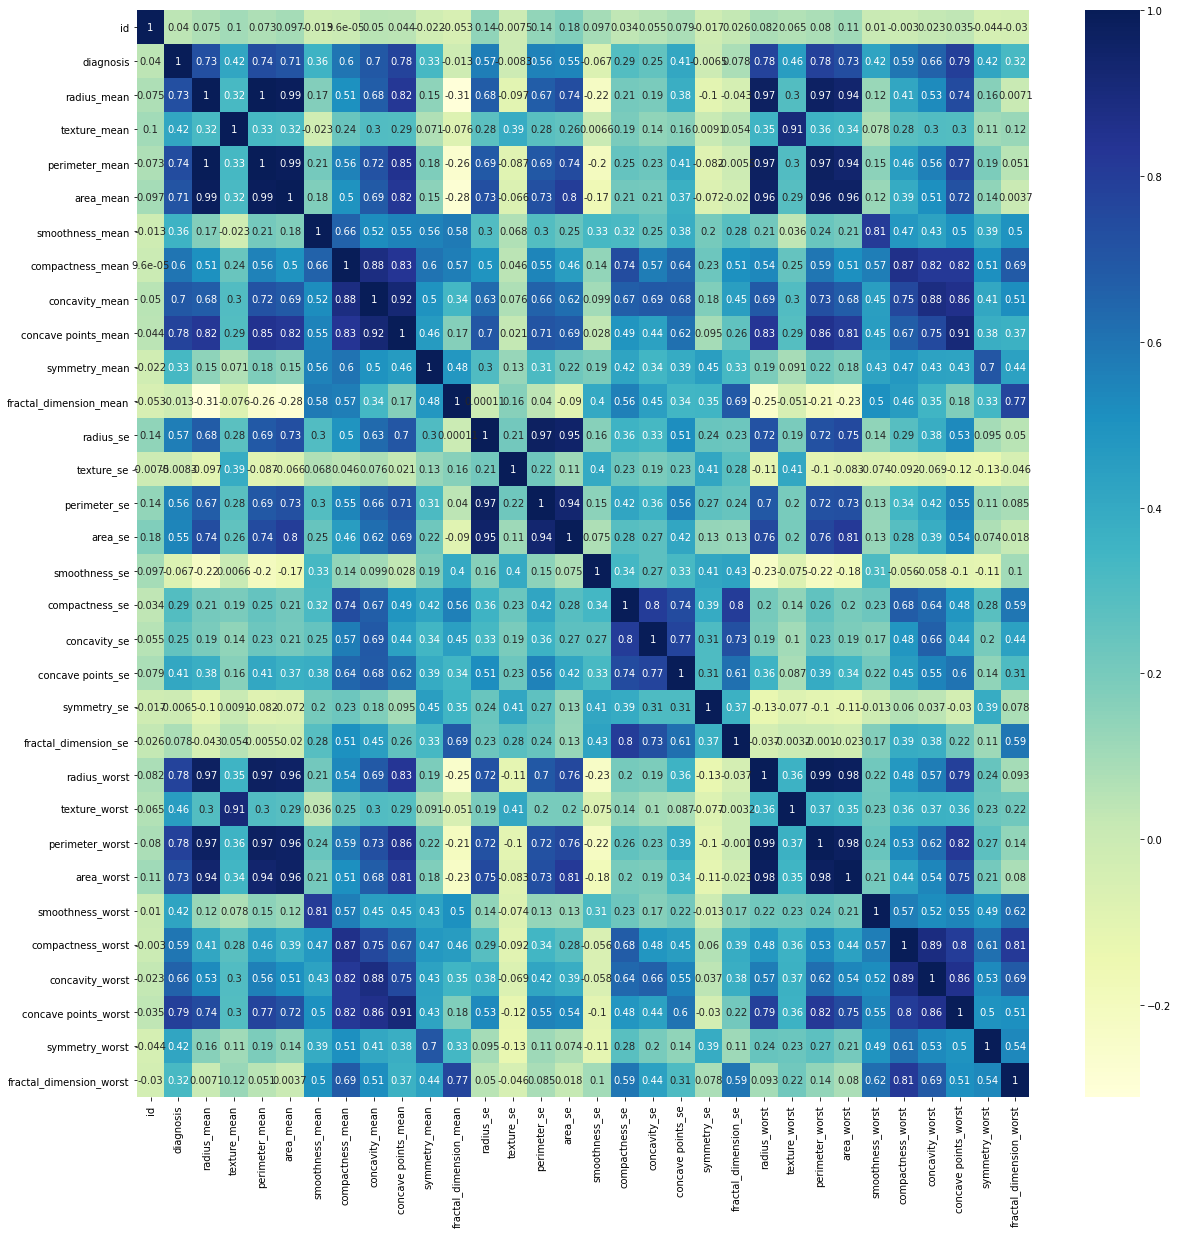

In [2]:
#Dropping the unwanted Unnamed:32 column
dataset=dataset.drop(columns={'Unnamed: 32'})

dataset['diagnosis']=dataset['diagnosis'].replace({'M':1,'B':0})
# Finding the correraltion between the features
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), cmap='YlGnBu', annot = True)

In [3]:
# We will now find out the features that have a higher correlation to diagnosis
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [4]:
# Creating a new dataframe which contains only the metrics that have a higher corr with diagnosis
df=dataset[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst']]

# The Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [5]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=dataset["diagnosis"]
X=dataset.drop(["diagnosis"],axis=1)
columns= dataset.columns.tolist()
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()
X= X.drop(outlier_index)
y= y.drop(outlier_index).values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), SVC(kernel="rbf",random_state=15), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="dart")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(random_state=15),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_met

In [7]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9565217391304348
KNeighborsClassifier 0.9751552795031055
SVC 0.9627329192546584
DecisionTreeClassifier 0.9503105590062112
RandomForestClassifier 0.9627329192546584
GradientBoostingClassifier 0.9503105590062112
AdaBoostClassifier 0.9751552795031055
[17:05:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.968944099378882


In [8]:
model=AdaBoostClassifier
model.fit(X_train,y_train)


TypeError: fit() missing 1 required positional argument: 'y'